# Case Study on Correlation and Regression

# A textile company regularly spent money on five advertising companies for their ads. (Dataset added along with)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r'C:\Users\Home\Downloads\Add_sales_data_2018.csv')

In [5]:
data.head( )

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [6]:
data.shape

(205, 7)

In [7]:
data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [8]:
data.isna( ).sum( )

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [9]:
data.describe( )

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

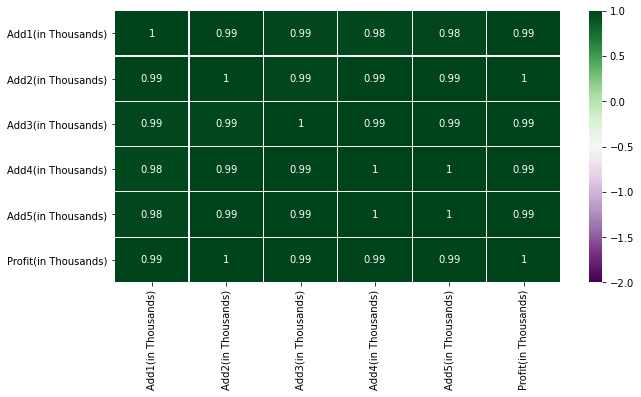

In [10]:
corrmatrix = data.corr( )
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,vmin=-2,vmax=1,annot=True,linewidth=0.2,cmap='PRGn')

Insight :
    The amount spent for advertising through 5 different companies and profit generated are highly positively correlated.

In [11]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [12]:
y = data['Profit(in Thousands)']
X = data.drop(['Profit(in Thousands)'],axis=1)

In [13]:
X.shape

(205, 6)

Text(0, 0.5, 'Profit(in Thousands)')

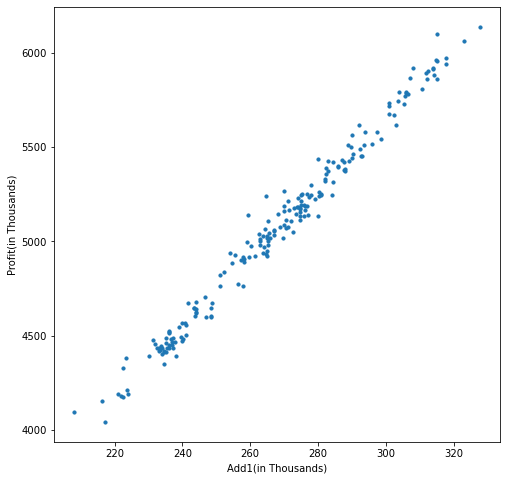

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(data['Add1(in Thousands)'],data['Profit(in Thousands)'],s=10)
plt.xlabel('Add1(in Thousands)')
plt.ylabel('Profit(in Thousands)')

Text(0, 0.5, 'Profit(in Thousands)')

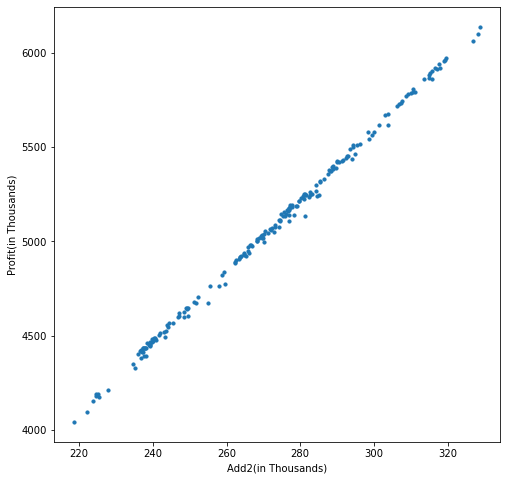

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(data['Add2(in Thousands)'],data['Profit(in Thousands)'],s=10)
plt.xlabel('Add2(in Thousands)')
plt.ylabel('Profit(in Thousands)')

Text(0, 0.5, 'Profit(in Thousands)')

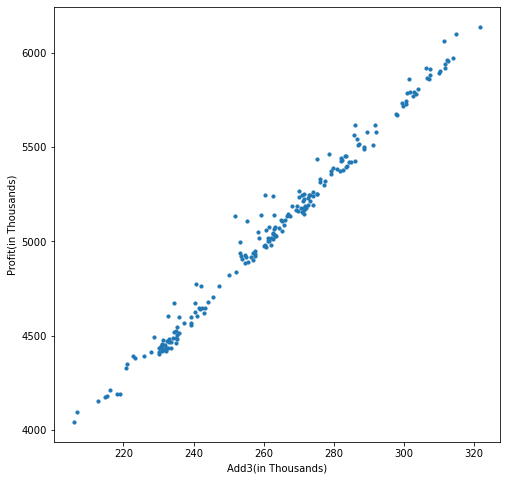

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(data['Add3(in Thousands)'],data['Profit(in Thousands)'],s=10)
plt.xlabel('Add3(in Thousands)')
plt.ylabel('Profit(in Thousands)')

Text(0, 0.5, 'Profit(in Thousands)')

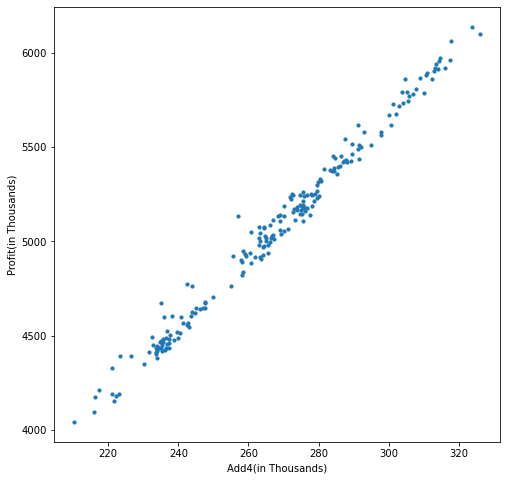

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(data['Add4(in Thousands)'],data['Profit(in Thousands)'],s=10)
plt.xlabel('Add4(in Thousands)')
plt.ylabel('Profit(in Thousands)')

Text(0, 0.5, 'Profit(in Thousands)')

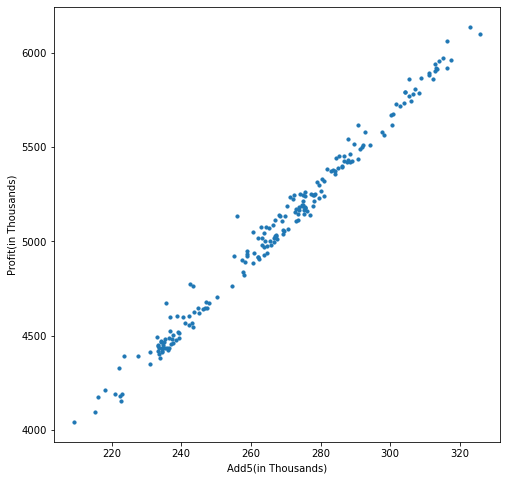

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(data['Add5(in Thousands)'],data['Profit(in Thousands)'],s=10)
plt.xlabel('Add5(in Thousands)')
plt.ylabel('Profit(in Thousands)')

Insight :
       From the above graphs it is clear that as the companies advertisement increases their profit also increases.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [35]:
from sklearn.linear_model import LinearRegression

X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [36]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = LinearRegression().fit(X_train, y_train)

In [39]:
predictions = clf.predict(X_test)

In [40]:
print(y_test)

52     4494.144
181    5921.116
5      4404.686
18     4190.965
188    5880.541
170    5728.804
76     5225.140
154    5017.503
104    5518.561
33     4513.600
12     4464.110
129    5140.372
55     4760.877
66     5038.222
45     4606.340
169    5730.999
130    4922.845
7      4470.775
37     4480.363
152    5065.652
80     5043.705
111    5491.792
131    4968.030
171    5792.175
179    6137.800
138    5247.011
156    5137.534
113    5373.275
161    5212.949
89     4898.776
183    5972.337
193    5745.806
125    5153.977
173    5805.521
92     4763.690
16     4175.677
189    5938.474
136    4915.682
22     4523.704
74     5113.337
44     4648.627
4      4350.683
71     4916.064
134    4934.682
145    5108.626
122    5167.878
26     4451.999
83     4980.446
149    5177.610
186    5861.830
8      4425.005
90     4887.296
Name: Profit(in Thousands), dtype: float64


Insight :
    As the advertising amount increases companies profit also increases.

In [41]:
print(predictions)

[4494.144 5921.116 4404.686 4190.965 5880.541 5728.804 5225.14  5017.503
 5518.561 4513.6   4464.11  5140.372 4760.877 5038.222 4606.34  5730.999
 4922.845 4470.775 4480.363 5065.652 5043.705 5491.792 4968.03  5792.175
 6137.8   5247.011 5137.534 5373.275 5212.949 4898.776 5972.337 5745.806
 5153.977 5805.521 4763.69  4175.677 5938.474 4915.682 4523.704 5113.337
 4648.627 4350.683 4916.064 4934.682 5108.626 5167.878 4451.999 4980.446
 5177.61  5861.83  4425.005 4887.296]


# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement
Add1(in Thousands) 290
Add2(in Thousands) 312
Add3(in Thousands) 309
Add4(in Thousands) 298
Add5(in Thousands) 320

In [19]:
data1 = {'Advertising companies':['Add1','Add2','Add3','Add4','Add5'],'Amount for advertisement':[290,312,309,298,320]}

In [21]:
data1

{'Advertising companies': ['Add1', 'Add2', 'Add3', 'Add4', 'Add5'],
 'Amount for advertisement': [290, 312, 309, 298, 320]}

In [37]:
y=data1['Amount for advertisement']
X=data1['Advertising companies']

TypeError: 'dict' object is not callable

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [32]:
from sklearn import linear_model

In [33]:
lr = linear_model.LinearRegression( )

In [34]:
model = lr.fit(X_train,y_train)

NameError: name 'X_train' is not defined